In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Superstore Data Analysis

This notebook performs an exploratory data analysis on a subset of the Superstore dataset, focusing on Sales, Profit, Quantity, and Discount.

## Data Loading and Initial Analysis

The Superstore dataset was loaded from an Excel file. A subset of the data containing 'Sales', 'Profit', 'Quantity', and 'Discount' columns was created. Initial analysis included displaying the first few rows, descriptive statistics, and the correlation matrix of this subset.

## Identifying and Addressing Missing Values

Missing values were identified in the 'Sales', 'Profit', and 'Quantity' columns. These missing values were imputed using the mean of their respective columns.

## Data Smoothing and Visualization

Moving averages with a window size of 20 were applied to the numerical columns to smooth the data. Histograms were plotted for 'Sales', 'Profit', 'Quantity', and 'Discount' to visualize their distributions.

## Correlation Analysis

A correlation analysis was performed on the 'Sales', 'Profit', 'Quantity', and 'Discount' columns to understand the relationships between these variables.

## Load Data

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/drive/MyDrive/Colab Data/Superstore.xlsx')

# Select the relevant columns
df_subset = df[['Sales', 'Profit', 'Quantity', 'Discount']]

# Display the first few rows of the subset DataFrame
display(df_subset.head())

,Sales,Profit,Quantity,Discount
0,261.9600,41.9136,2.0,0.00
1,731.9400,219.5820,3.0,0.00
2,14.6200,6.8714,2.0,0.00
3,957.5775,-383.0310,5.0,0.45
4,22.3680,2.5164,2.0,0.20


##Analyze New Data Frame

In [ ]:
# Describe the numerical columns to understand central tendency, dispersion, etc.
display(df_subset.describe())

# Analyze the correlation matrix
display(df_subset.corr())

,Sales,Profit,Quantity,Discount
count,8995.000000,8995.000000,8995.000000,9994.000000
mean,228.113064,29.152067,3.783324,0.156203
std,628.012276,239.964124,2.207662,0.206452
min,0.444000,-6599.978000,1.000000,0.000000
25%,17.120000,1.724800,2.000000,0.000000
50%,53.952000,8.611200,3.000000,0.200000
75%,209.534000,29.139950,5.000000,0.200000
max,22638.480000,8399.976000,14.000000,0.800000


,Sales,Profit,Quantity,Discount
Sales,1.000000,0.532269,0.193760,-0.024076
Profit,0.532269,1.000000,0.065007,-0.215552
Quantity,0.193760,0.065007,1.000000,0.005240
Discount,-0.024076,-0.215552,0.005240,1.000000


## Identify and Describe Missing Values

In [ ]:
print("\nMissing values per column:")
display(df_subset.isnull().sum())


Missing values per column:


,0
Sales,999
Profit,999
Quantity,999
Discount,0


## Address Missing Values

In [ ]:
# Handle missing values in Sales, Profit, and Quantity by imputing with the mean
for col in ['Sales', 'Profit', 'Quantity']:
    if df_subset[col].isnull().any():
        mean_val = df_subset[col].mean()
        df_subset[col].fillna(mean_val, inplace=True)

display(df_subset.isnull().sum())

,0
Sales,0
Profit,0
Quantity,0
Discount,0


##Plot Moving Average

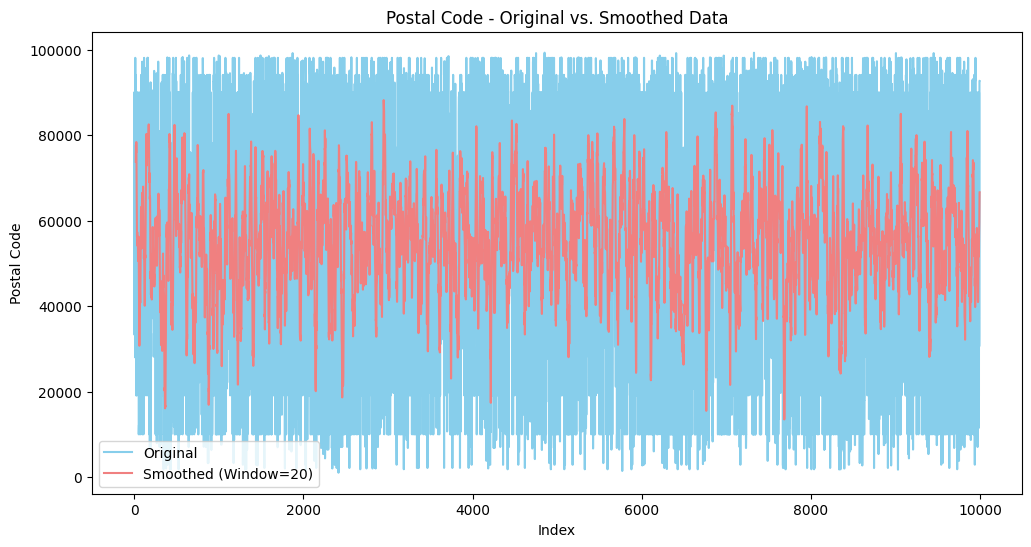

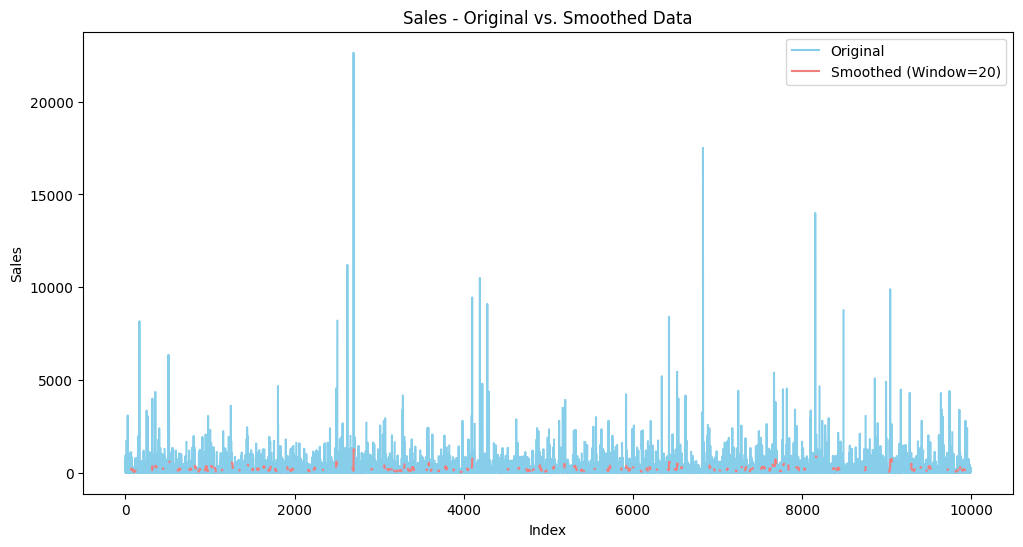

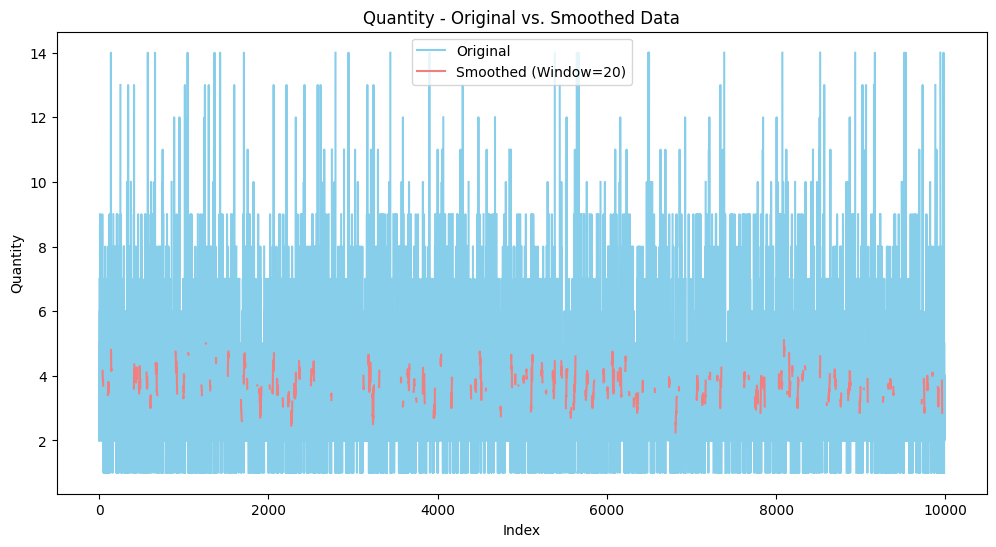

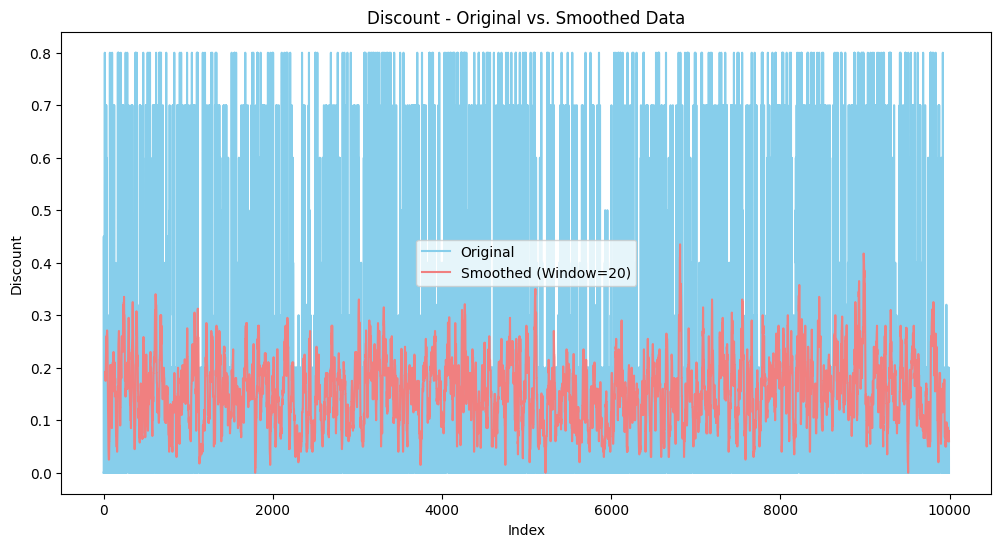

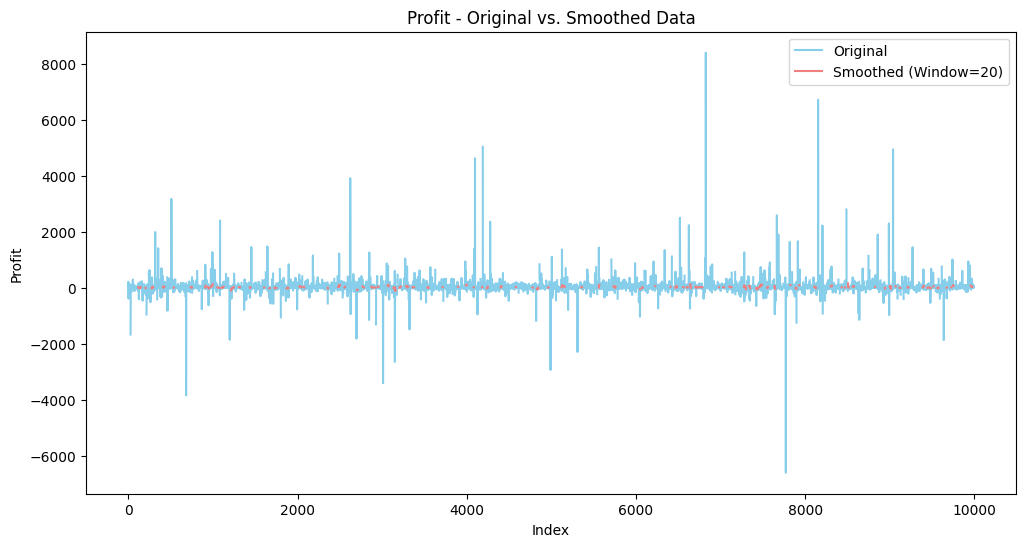

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Select only numerical columns for rolling mean calculation
df_numeric = df.select_dtypes(include=['number'])

# Apply moving average with a window size of 20
window_size = 20
df_smoothed = df_numeric.rolling(window=window_size).mean()

# Plot original vs. smoothed data for each numerical feature except 'Row ID'
for col in df_numeric.columns:
    if col != 'Row ID':
        plt.figure(figsize=(12, 6))
        plt.plot(df_numeric[col], label='Original', color='skyblue')
        plt.plot(df_smoothed[col], label=f'Smoothed (Window={window_size})', color='lightcoral')
        plt.title(f'{col} - Original vs. Smoothed Data')
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.legend()
        plt.show()

## Plot Histograms

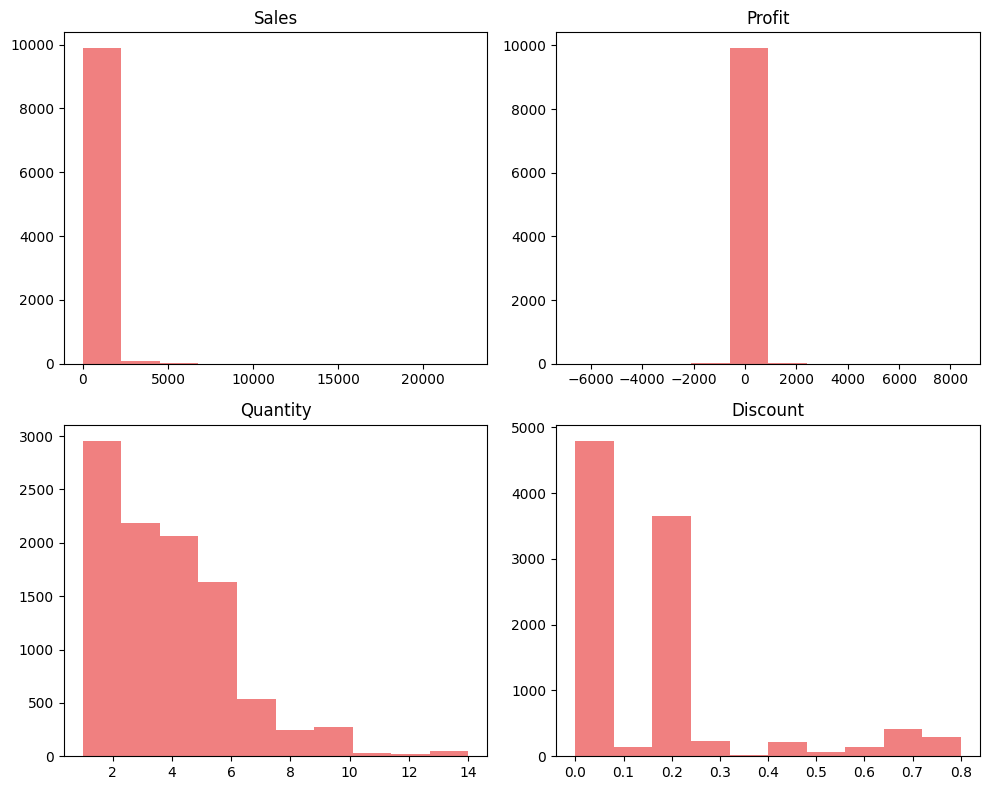

In [ ]:
import matplotlib.pyplot as plt
# plot histograms of the variables with lightcoral color
df_subset[['Sales', 'Profit', 'Quantity', 'Discount']].hist(figsize=(10, 8), color='lightcoral', grid=False)
plt.tight_layout()
plt.show()

## Correlation Analysis of the data

In [ ]:
display(df_subset[['Sales', 'Profit', 'Quantity', 'Discount']].corr())

,Sales,Profit,Quantity,Discount
Sales,1.000000,0.486179,0.168163,-0.022711
Profit,0.486179,1.000000,0.054813,-0.204450
Quantity,0.168163,0.054813,1.000000,0.004995
Discount,-0.022711,-0.204450,0.004995,1.000000
